# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy.core as owm
from datetime import datetime as dt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)


606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
weather_data = pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])
weather_data.head()
# Create a settings object with your API key and preferred units
settings = {"units": "metric", "appid": api_key}
summary = ["main.humidity", "coord.lat", "coord.lon", "main.temp_max", "wind.speed", "clouds.all", "sys.country", "dt"]
# Get current weather
count = 0
result=[]
result.append(f"Beginning Data Retrieval    ")
result.append(f"------------------------------")
print(f"Beginning Data Retrieval    ")
print(f"------------------------------")
for city in cities:
    count = count + 1    
    try:
        current_weather = owm.get_current(city, **settings)
        result.append(f"Processing Record {count} of Set {len(cities)} | {city}") 
        print(f"Processing Record {count} of Set {len(cities)} | {city}") 
        data = current_weather(*summary)
        weather_data = weather_data.append({"City": city, "Date": data[7], "Lat": data[1], "Lng": data[2], "Max Temp": data[3], "Humidity": data[0], "Wind Speed": data[4], "Cloudiness": data[5], "Country": data[6]}, ignore_index=True)
    except: 
        result.append(f"City not found. Skipping...")
with open('output.csv', mode='w', newline='') as summary:
    summary_writer = csv.writer(summary, delimiter=',')
    [summary_writer.writerow([x]) for x in result]

Beginning Data Retrieval    
------------------------------
Processing Record 1 of Set 606 | port alfred
Processing Record 2 of Set 606 | puerto ayora
Processing Record 3 of Set 606 | roma
Processing Record 4 of Set 606 | cabo san lucas
Processing Record 6 of Set 606 | tandil
Processing Record 7 of Set 606 | narsaq
Processing Record 8 of Set 606 | barinitas
Processing Record 9 of Set 606 | butaritari
Processing Record 11 of Set 606 | rikitea
Processing Record 12 of Set 606 | mar del plata
Processing Record 13 of Set 606 | mataura
Processing Record 14 of Set 606 | nome
Processing Record 15 of Set 606 | hilo
Processing Record 16 of Set 606 | sao filipe
Processing Record 17 of Set 606 | the valley
Processing Record 18 of Set 606 | kapaa
Processing Record 19 of Set 606 | jamestown
Processing Record 21 of Set 606 | cidreira
Processing Record 22 of Set 606 | mersing
Processing Record 23 of Set 606 | punta arenas
Processing Record 24 of Set 606 | trapani
Processing Record 25 of Set 606 | barr

Processing Record 213 of Set 606 | pangody
Processing Record 214 of Set 606 | saiha
Processing Record 215 of Set 606 | aldan
Processing Record 216 of Set 606 | leningradskiy
Processing Record 217 of Set 606 | beloha
Processing Record 218 of Set 606 | marawi
Processing Record 219 of Set 606 | el campo
Processing Record 220 of Set 606 | codrington
Processing Record 223 of Set 606 | bougouni
Processing Record 224 of Set 606 | road town
Processing Record 226 of Set 606 | vizinga
Processing Record 227 of Set 606 | chuy
Processing Record 228 of Set 606 | obihiro
Processing Record 229 of Set 606 | nipawin
Processing Record 230 of Set 606 | san antero
Processing Record 231 of Set 606 | vanavara
Processing Record 232 of Set 606 | lavrentiya
Processing Record 233 of Set 606 | kalmunai
Processing Record 234 of Set 606 | tadine
Processing Record 235 of Set 606 | hare bay
Processing Record 237 of Set 606 | beringovskiy
Processing Record 238 of Set 606 | bayji
Processing Record 239 of Set 606 | hami

Processing Record 417 of Set 606 | yumen
Processing Record 418 of Set 606 | fairbanks
Processing Record 419 of Set 606 | ponta do sol
Processing Record 421 of Set 606 | waipawa
Processing Record 422 of Set 606 | makakilo city
Processing Record 423 of Set 606 | tutoia
Processing Record 424 of Set 606 | port hardy
Processing Record 425 of Set 606 | priargunsk
Processing Record 426 of Set 606 | kalevala
Processing Record 427 of Set 606 | nazarovo
Processing Record 428 of Set 606 | te anau
Processing Record 429 of Set 606 | ulladulla
Processing Record 430 of Set 606 | cotonou
Processing Record 431 of Set 606 | kachug
Processing Record 432 of Set 606 | bitung
Processing Record 433 of Set 606 | candido mendes
Processing Record 434 of Set 606 | san quintin
Processing Record 435 of Set 606 | cam ranh
Processing Record 436 of Set 606 | batagay-alyta
Processing Record 437 of Set 606 | catuday
Processing Record 438 of Set 606 | darhan
Processing Record 439 of Set 606 | manokwari
Processing Record

In [29]:

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port alfred,8,ZA,1537507421,100,-33.59,26.89,14.71,4.55
1,puerto ayora,68,EC,1537507375,100,-0.74,-90.35,20.41,4.50
2,roma,0,IT,1537505700,93,41.89,12.48,20.00,0.50
3,cabo san lucas,5,MX,1537501380,88,22.89,-109.91,26.00,3.60
4,tandil,64,AR,1537507422,54,-37.33,-59.14,12.31,4.05


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
weather_data.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

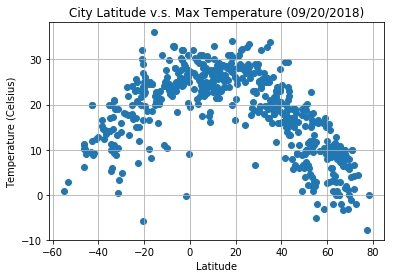

In [31]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")
plt.title("City Latitude v.s. Max Temperature (09/20/2018)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("MaxTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

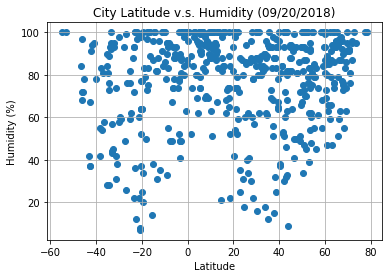

In [32]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")
plt.title("City Latitude v.s. Humidity (09/20/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

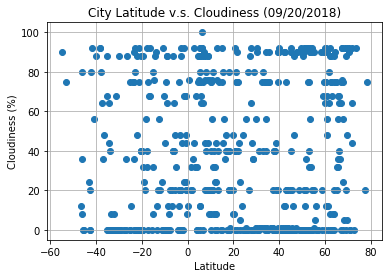

In [33]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")
plt.title("City Latitude v.s. Cloudiness (09/20/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

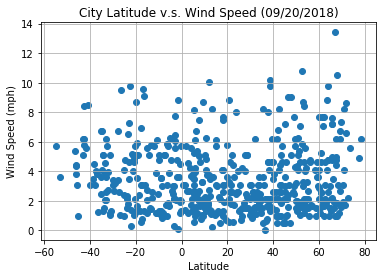

In [34]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")
plt.title("City Latitude v.s. Wind Speed (09/20/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("WindSpeed.png")

# Show plot
plt.show()